---
title: "GIOZA Case Study: Temperature EDA"
format:
  html:
    toc: true
    toc-title: Contents
    toc-depth: 4
    code-fold: show
    self-contained: true
jupyter: python3
---

# Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plotnine import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
factory_temp = pd.read_csv('data/temperature.csv')

# Data Preparation

In [3]:
# check for missing values
print( factory_temp.isnull().sum() )

at    0
T     0
dtype: int64


In [4]:
# return dtypes
print( factory_temp.dtypes )

at     object
T     float64
dtype: object


In [5]:
# convert predictors into proper datatype
factory_temp['at'] = pd.to_datetime(factory_temp['at'])
factory_temp = factory_temp.sort_values(by=['at'], ascending=True).reset_index(drop=True)

print( factory_temp.dtypes )

at    datetime64[ns, UTC]
T                 float64
dtype: object


# Data Visualizations

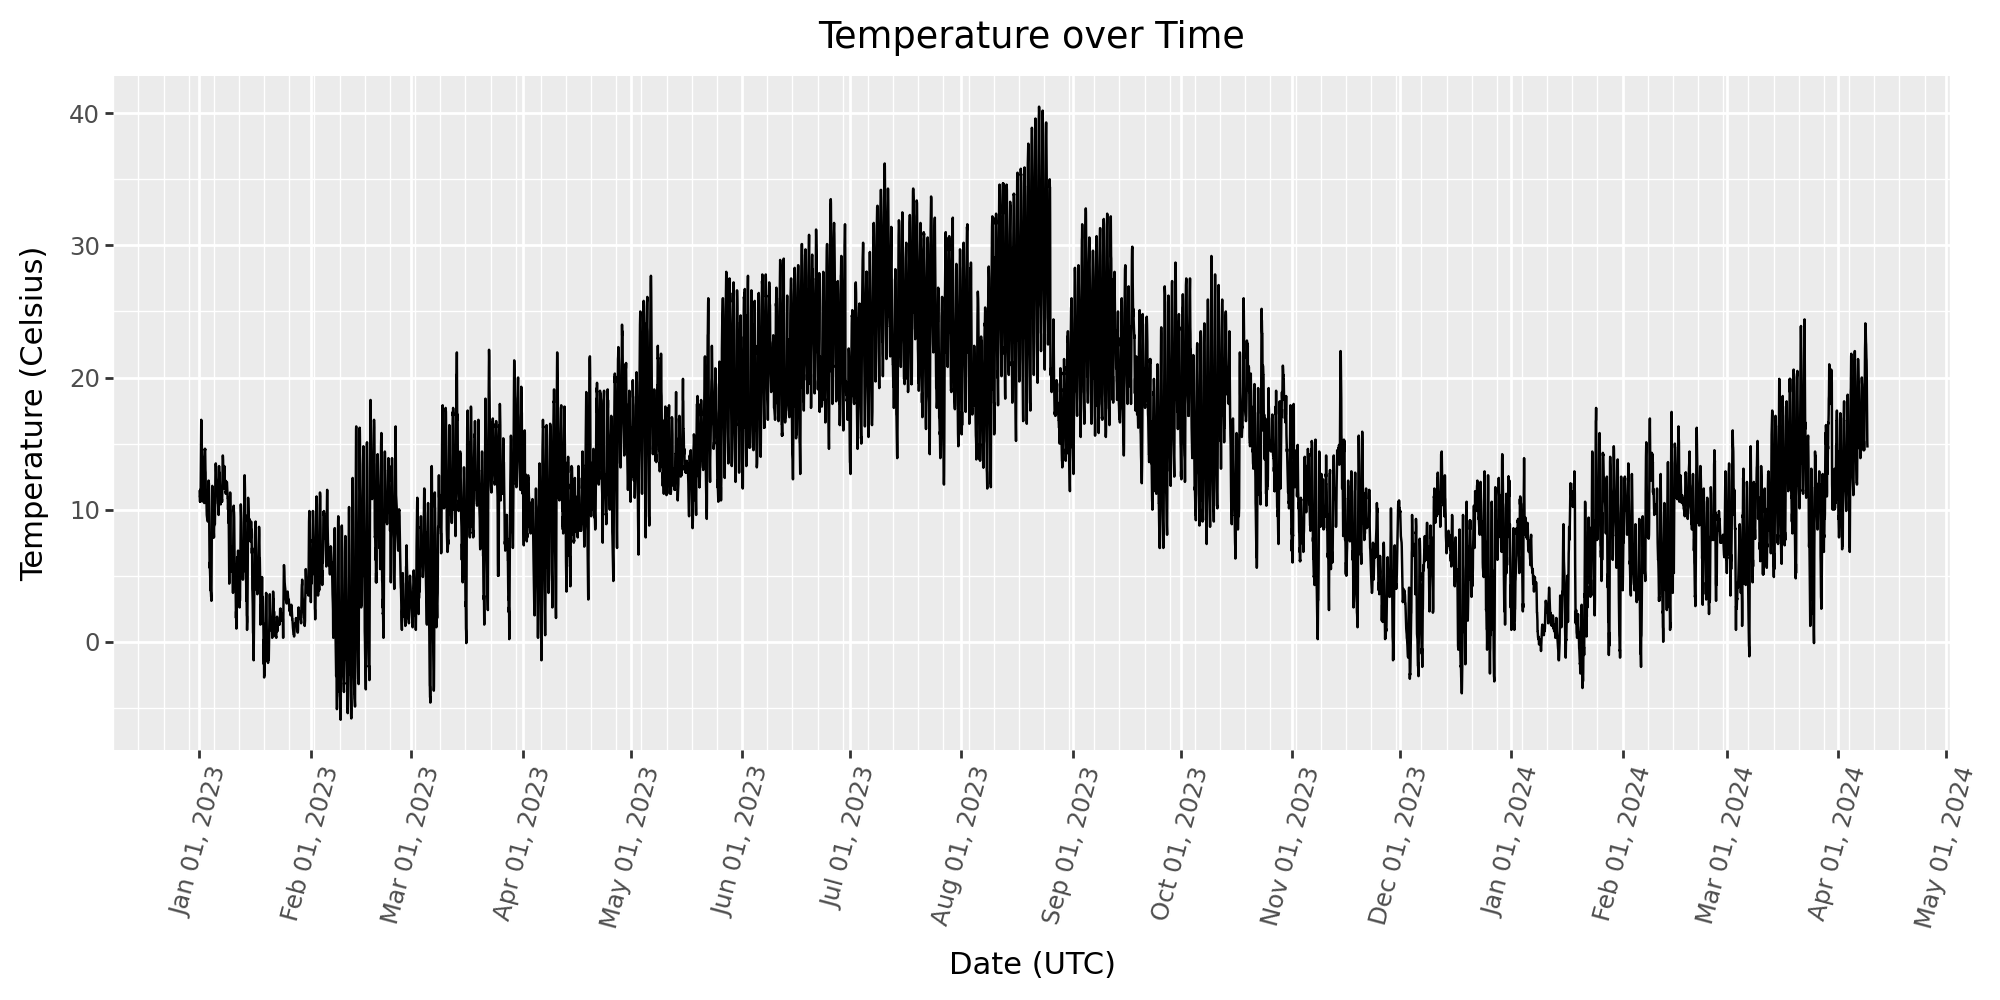

In [6]:
(
    ggplot(factory_temp, aes(x='at', y='T'))
    + geom_line()
    + scale_x_datetime(date_breaks='1 month', date_minor_breaks='1 week', date_labels="%b %d, %Y")
    + theme(figure_size=(10,5), axis_text_x=element_text(angle=75))
    + labs(x = 'Date (UTC)', y = 'Temperature (Celsius)', title = 'Temperature over Time')
)